In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
import numpy as np

In [94]:
np.random.seed(42)

In [95]:
import tensorflow as tf

In [96]:
tf.__version__

'2.1.0'

In [97]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [98]:
(D_Train, Y_Train), (D_Test, Y_Test) = mnist.load_data()

In [99]:
len(D_Train)

60000

In [100]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

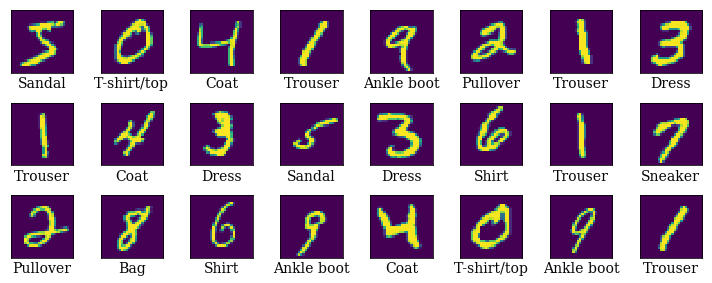

In [101]:
font_dict_params = {'family': 'serif', 'color': '#080808', 'weight': 'normal', 'size': 14}
figure_inst_i = plt.figure(figsize = (10, 4))
for i in range(24):
    
    plt.subplot(3, 8, i+1)
    plt.imshow(D_Train[i])
    plt.xticks([])
    plt.yticks([])
    
    xlabel = class_names[Y_Train[i]]
    plt.xlabel(xlabel, fontdict = font_dict_params)
    plt.grid(True)

figure_inst_i.tight_layout()

In [102]:
print('D_Train shape : ', D_Train.shape)
print('Y_Train shape  : ', Y_Train.shape)

print('D_Test shape : ', D_Test.shape)
print('Y_Test shape  : ', Y_Test.shape)

D_Train shape :  (60000, 28, 28)
Y_Train shape  :  (60000,)
D_Test shape :  (10000, 28, 28)
Y_Test shape  :  (10000,)


In [103]:
input_pixels = np.multiply(D_Train.shape[1], D_Train.shape[2])
d_train_raw = D_Train.reshape(D_Train.shape[0], input_pixels).astype('float32') / 255
d_test_raw = D_Test.reshape(D_Test.shape[0], input_pixels).astype('float32') / 255

In [104]:
d_train_raw.shape

(60000, 784)

In [105]:
y_train_raw = Y_Train.astype('float32')

In [106]:
print(D_Train.min())
print(D_Train.max())

0
255


In [107]:
#d_train = d_train_raw.astype('float32')
#d_test = d_test_raw.astype('float32')

In [108]:
#print('d_train shape : ', d_train.shape)
#print('d_test shape  : ', d_test.shape)

In [109]:
y_train = to_categorical(Y_Train, 10)
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000, 10)


In [110]:
y_test = to_categorical(Y_Test, num_classes = 10)
print(type(y_test))
print(y_test.shape)

<class 'numpy.ndarray'>
(10000, 10)


In [111]:
#d_train_n = np.divide(d_train, d_train.max())
#d_test_n = np.divide(d_test, d_train.max())

In [112]:
BATCH_SIZE = 32

In [113]:
model = Sequential()
model.add(Input(shape = (input_pixels, )))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(10, activation = 'softmax', kernel_initializer = 'normal'))

In [114]:
optimizer = Adam(learning_rate = 0.05)

In [115]:
#model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.compile(
                optimizer = optimizer,
                loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics = ['sparse_categorical_accuracy']
            )

In [116]:
model.fit(d_train_raw, y = y_train_raw, batch_size = BATCH_SIZE, validation_split = 0.2, epochs = 1)

Train on 48000 samples, validate on 12000 samples
48000/48000 [==============================] - 14s 300us/sample - loss: 0.5717 - sparse_categorical_accuracy: 0.8587 - val_loss: 0.4983 - val_sparse_categorical_accuracy: 0.8842


In [117]:
predictions = model.predict(x = d_test_raw, batch_size = 64)

In [123]:
predicted_class = np.argmax(predictions[0])

In [124]:
class_names[predicted_class]

'Sneaker'